In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.layers import Dense, Input, Dropout, BatchNormalization, Activation, LSTM
from keras.models import Model, Sequential, load_model
from keras import regularizers
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler, LabelBinarizer
from sklearn.externals import joblib 

import collections

Using TensorFlow backend.


In [164]:
dfRaw = pd.read_csv("processedData.csv")
dfRaw = dfRaw.drop(["_id"],axis = 1)
dfRaw.head()
dfTrain, dfTest = train_test_split(dfRaw)

In [165]:
#preprocessing 
#dfTrain, dfTest = train_test_split(dfRaw)

y_train = dfTrain["result"]
X_train = dfTrain.drop(["result"],axis = 1)

y_test = dfTest["result"]
X_test = dfTest.drop(["result"],axis = 1)

normalizer = StandardScaler()
X_train = normalizer.fit_transform(X_train)
X_test = normalizer.transform(X_test)

encoder = LabelBinarizer()
y_categorical = encoder.fit_transform(y_train)
y_categorical_test = encoder.transform(y_test)

/anaconda/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  if sys.path[0] == '':


In [166]:
neurons = 10
dropout = 0.125
epochs = 50

model = Sequential()

model.add(Dense(neurons,input_dim = 21))
model.add(Activation('elu'))
model.add(Dropout(dropout))

model.add(Dense(neurons))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Dropout(dropout))

model.add(Dense(neurons))
model.add(Activation('relu'))
model.add(Dropout(dropout))

model.add(Dense(3,activation = "softmax"))

model.compile(loss = "categorical_crossentropy",optimizer = "adam",metrics = ['acc'])

model.fit(X_train, y_categorical, batch_size = 128,validation_data=(X_test,y_categorical_test), epochs=epochs, verbose=1)

Train on 47309 samples, validate on 15770 samples
Epoch 1/50
47309/47309 [==============================] - 3s 55us/step - loss: 1.0863 - acc: 0.4397 - val_loss: 1.0261 - val_acc: 0.4731
Epoch 2/50
47309/47309 [==============================] - 1s 22us/step - loss: 1.0340 - acc: 0.4723 - val_loss: 1.0190 - val_acc: 0.4871
Epoch 3/50
47309/47309 [==============================] - 1s 22us/step - loss: 1.0278 - acc: 0.4823 - val_loss: 1.0166 - val_acc: 0.4883
Epoch 4/50
47309/47309 [==============================] - 1s 23us/step - loss: 1.0225 - acc: 0.4845 - val_loss: 1.0149 - val_acc: 0.4902
Epoch 5/50
47309/47309 [==============================] - 1s 23us/step - loss: 1.0207 - acc: 0.4884 - val_loss: 1.0134 - val_acc: 0.4914
Epoch 6/50
47309/47309 [==============================] - 1s 23us/step - loss: 1.0192 - acc: 0.4884 - val_loss: 1.0126 - val_acc: 0.4938
Epoch 7/50
47309/47309 [==============================] - 1s 23us/step - loss: 1.0179 - acc: 0.4915 - val_loss: 1.0125 - val_acc

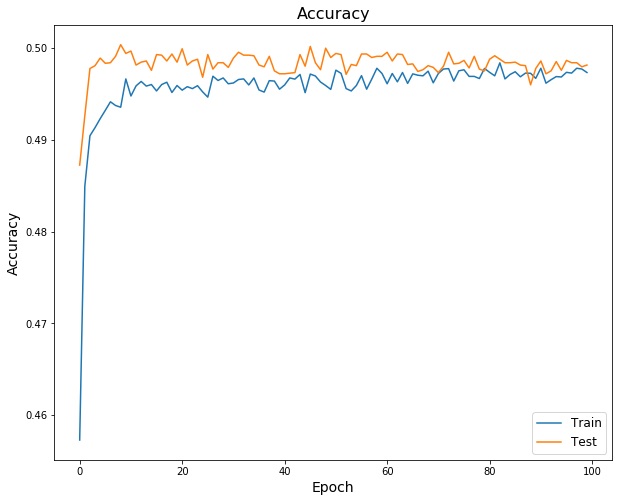

In [11]:
import matplotlib.pyplot as plt
plt.figure(figsize= (10,8))
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('Accuracy',fontsize = 16)
plt.ylabel('Accuracy',fontsize = 14)
plt.xlabel('Epoch', fontsize = 14)
plt.legend(['Train', 'Test'], loc='lower right', fontsize = 12)
plt.show()



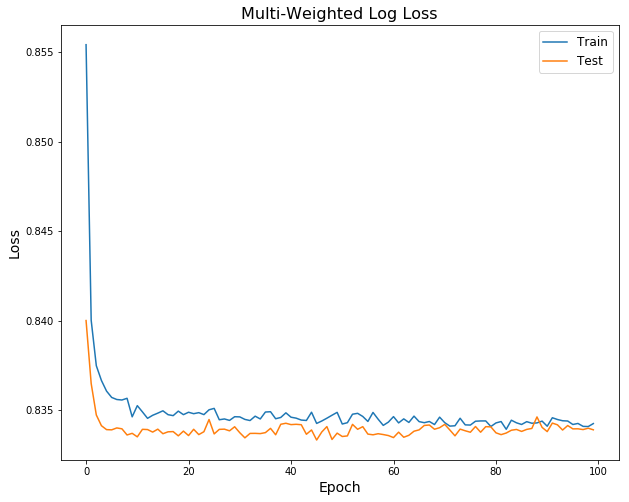

In [12]:
plt.figure(figsize= (10,8))
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.title('Multi-Weighted Log Loss',fontsize = 16)
plt.ylabel('Loss', fontsize = 14)
plt.xlabel('Epoch',fontsize = 14)
plt.legend(['Train', 'Test'], loc='upper right',fontsize = 12)
plt.show()

In [24]:
X_train[0]

array([-0.1890944 , -0.49976135, -0.3846741 , -0.86718027,  1.62293193,
       -0.91199711, -0.01956781, -0.46862902, -1.17403423, -0.38306406,
       -0.45696161,  0.36199767,  0.66555181, -1.13228944,  0.73178437,
        0.92094779,  1.24980452, -0.04980579,  0.78895905, -0.69243507,
        0.20356312])

In [79]:
rand_sample

array([[  0.19047619,   0.27777778,   0.5988024 ,   2.        ,
          0.        ,   3.        ,   7.        ,  12.        ,
         60.        ,  21.        ,  52.        ,  23.        ,
          8.        ,   5.        ,   2.        ,  29.        ,
         15.        , 182.        ,  70.        , 186.        ,
         60.        ]])

In [120]:
prediction = model.predict(rand_sample)

In [122]:
encoder.inverse_transform(prediction)


array(['H'], dtype='<U1')

In [91]:
dfTrain, dfTest = train_test_split(dfRaw)

y_train = dfTrain["result"]
X_train = dfTrain.drop(["result"],axis = 1)

y_test = dfTest["result"]
X_test = dfTest.drop(["result"],axis = 1)

In [99]:
rand_sample = np.array(X_test.sample(1))
rand_sample = normalizer.transform(rand_sample)
prediction = model.predict(rand_sample)
prediction[0]

array([0.20054555, 0.25927624, 0.5401782 ], dtype=float32)

In [93]:
prediction[0]

array([0.34679443, 0.29016504, 0.36304054], dtype=float32)

In [12]:
encoder.inverse_transform(prediction)/

array(['H'], dtype='<U1')

In [100]:
model.save('soccer_odds_model.h5')
joblib.dump(normalizer, 'normalizer.pkl') 

['normalizer.pkl']

In [7]:
model = load_model('soccer_odds_model.h5')
normalizer = joblib.load('normalizer.pkl') 

In [ ]:
#simulation

In [167]:
predictions = model.predict(X_test)
dfTest = dfTest.reset_index()
predictions

array([[0.37863037, 0.28671545, 0.33465424],
       [0.1849652 , 0.254342  , 0.5606928 ],
       [0.25785667, 0.282373  , 0.45977026],
       ...,
       [0.27465826, 0.2865209 , 0.43882084],
       [0.2169145 , 0.2773639 , 0.5057216 ],
       [0.09848309, 0.20303236, 0.69848454]], dtype=float32)

In [168]:
dfTest['oddsHome'] = dfTest['oddsHome'].apply(lambda x: 1/x)
dfTest['oddsAway'] = dfTest['oddsAway'].apply(lambda x: 1/x)
dfTest['oddsDraw'] = dfTest['oddsDraw'].apply(lambda x: 1/x)
dfTest

,index,result,oddsHome,oddsDraw,oddsAway,homeWins,homeDraws,homeLosses,homeGoals,homeOppGoals,...,homeOppShotsTargets,awayWins,awayDraws,awayLosses,awayGoals,awayOppGoals,awayShots,awayShotsTargets,awayOppShots,awayOppShotsTargets
0,12888,H,0.344828,0.303030,0.380228,2,4,4,8,16,...,47,3,5,2,12,9,127,45,142,51
1,45688,H,0.621118,0.294118,0.181818,6,3,2,13,5,...,73,2,0,7,12,18,88,43,122,58
2,36461,H,0.500000,0.294118,0.266667,1,2,7,14,20,...,54,2,3,5,9,16,131,40,106,45
3,45211,H,0.617284,0.263158,0.181818,3,4,4,13,16,...,76,2,3,4,9,13,66,35,96,48
4,4126,H,0.526316,0.294985,0.250000,2,5,3,16,17,...,58,1,6,3,15,17,90,38,96,50
5,27859,D,0.294118,0.294118,0.476190,1,3,6,14,24,...,59,2,5,3,13,11,115,50,112,55
6,18803,H,0.833333,0.166667,0.066667,8,1,1,18,4,...,20,2,0,8,14,21,109,32,124,42
7,1493,A,0.490196,0.285714,0.277778,3,2,5,14,17,...,45,4,2,4,11,9,124,45,116,38
8,10881,D,0.400000,0.312500,0.312500,3,3,4,11,17,...,40,4,3,3,11,15,126,34,123,49
9,11021,A,0.523560,0.266667,0.230947,5,1,4,17,14,...,46,2,6,2,14,18,92,40,125,46


In [198]:
dfPred = pd.DataFrame(predictions)
dfPred.columns = ["modelAway","modelDraw","modelHome"]
dfPred = pd.concat([dfPred,dfTest], axis=1)
dfPred["homeEdge"] = dfPred["modelHome"] - dfPred["oddsHome"]
dfPred["drawEdge"] = dfPred["modelDraw"] - dfPred["oddsDraw"]
dfPred["awayEdge"] = dfPred["modelAway"] - dfPred["oddsAway"]

def simulator(threshold, dfPred):
    cash = 0
    play_count = 0
    hit_count = 0
    for index,row in dfPred.iterrows():

        if row["homeEdge"] > threshold:
            play = "H"
            col = "oddsHome"
        elif row["awayEdge"] > threshold:
            play = "A"
            col = "oddsAway"
        elif row["drawEdge"] > threshold:
            play = "D"
            col = "oddsDraw"
        else:
            play = "N"
        if play != "N":
            odds = 1/row[col]
            if odds > 4:
                play_count += 1
                if row["result"] == play:
                    hit_count +=1
                    #print(odds)
                    cash += 20 * odds - 20
                else:
                    cash -= 20
    print(hit_count)
    return cash,play_count

cash, play_count = simulator(0.02, dfPred)

print(play_count,cash)

127
632 1917.7999999999997


In [158]:
print(play_count,cash)

7288 -13549.619999999992
